In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [9]:
def data_cleaning(csv_file):
    trained = pd.read_csv(csv_file, encoding = "ISO-8859-1").drop('Unnamed: 0', axis = 1)
    trained.columns = ['sentiment', 'id', 'date', 'flag', 'user', 'text']
    trained = trained[['text', 'sentiment']]
    trained['sentiment'] = trained['sentiment'].replace(0, -1).replace(4, 1).replace(2, 0)
    trained['text'] = trained['text'].str.lower()
    labels = trained['sentiment']
    return trained
def remove_hashtags(text):
    text = re.sub(r"^#\S+|\s#\S+", '', text)
    return text
def remove_urls(text):
    text = re.sub(r'http\S+', '', text)
    return text
def remove_ats(text):
    text = re.sub(r"^@\S+|\s@\S+", '', text)
    return text
def text_cleaning(df):
    df['text'] = df['text'].apply(remove_hashtags)
    df['text'] = df['text'].apply(remove_urls)
    df['text'] = df['text'].apply(remove_ats)
    return df

In [3]:
def SVC_model(cleaned):
    X_train, X_vali, y_train, y_vali = train_test_split(cleaned['text'], cleaned['sentiment'], test_size = 0.25, random_state=0)
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(X_train)
    dictionary = vectorizer.get_feature_names()
    X_validation = vectorizer.transform(X_vali)
    X_train_bag_of_words_rep = X.toarray()
    X_vali_bag_of_words_rep = X_validation.toarray()
    clf = SVC(C = 0.1, kernel = 'linear', gamma = "auto")
    clf.fit(X,y_train)
    result = clf.predict(X_validation)
    accuracy = accuracy_score(result, y_vali)
    return accuracy, result

In [4]:
df = data_cleaning('./data/interim/'+'trained_clean.csv')
cleaned = text_cleaning(df)
cleaned = cleaned.sample(frac=0.1)

In [5]:
X_train, X_vali, y_train, y_vali = train_test_split(cleaned['text'], cleaned['sentiment'], test_size = 0.25, random_state=0)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_train)
dictionary = vectorizer.get_feature_names()
X_validation = vectorizer.transform(X_vali)
X_train_bag_of_words_rep = X.toarray()
X_vali_bag_of_words_rep = X_validation.toarray()

In [6]:
clf = SVC(C = 0.1, kernel = 'linear', gamma = "auto")
clf.fit(X,y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
X

<120000x59065 sparse matrix of type '<class 'numpy.int64'>'
	with 1341362 stored elements in Compressed Sparse Row format>

In [19]:
df_temp = pd.read_csv('./data/interim/2020-03-22-clean.csv')['clean_text'].dropna()
test = vectorizer.transform(df_temp)
pred = clf.predict(test)

In [25]:
import os
for i in os.listdir('./data/interim'):
    if '-clean' in i:
        df_temp = pd.read_csv('./data/interim/'+i,lineterminator='\n')['clean_text'].dropna()
        test = vectorizer.transform(df_temp)
        pred = clf.predict(test)
        df_test = pd.DataFrame({'text':df_temp, 'sentiment':pred})
        df_test.to_csv('./data/prediction/'+i[:-4]+'-pred.csv',index=False)
        print(i)

2020-10-04-clean.csv
2020-05-10-clean.csv
2020-07-13-clean.csv
2020-04-11-clean.csv
2020-11-05-clean.csv
2020-06-12-clean.csv
2020-07-12-clean.csv
2020-10-05-clean.csv
2020-05-11-clean.csv
2020-06-13-clean.csv
2020-04-10-clean.csv
2020-11-04-clean.csv
2020-07-11-clean.csv
2020-05-12-clean.csv
2020-10-06-clean.csv
2020-09-30-clean.csv
2020-08-19-clean.csv
2020-06-10-clean.csv
2020-08-31-clean.csv
2020-11-07-clean.csv
2020-04-13-clean.csv
2020-09-18-clean.csv
2020-05-13-clean.csv
2020-10-07-clean.csv
2020-07-10-clean.csv
2020-08-18-clean.csv
2020-08-30-clean.csv
2020-11-06-clean.csv
2020-04-12-clean.csv
2020-06-11-clean.csv
2020-09-19-clean.csv
2020-04-15-clean.csv
2020-11-01-clean.csv
2020-06-16-clean.csv
2020-10-28-clean.csv
2020-05-14-clean.csv
2020-07-17-clean.csv
2020-11-29-clean.csv
2020-06-17-clean.csv
2020-04-14-clean.csv
2020-10-29-clean.csv
2020-07-16-clean.csv
2020-10-01-clean.csv
2020-05-15-clean.csv
2020-11-28-clean.csv
2020-06-14-clean.csv
2020-11-03-clean.csv
2020-04-17-cl

In [26]:
preds = []
for i in os.listdir('./data/prediction'):
    df_temp = pd.read_csv('./data/prediction/'+i)
    preds += [sum(df_temp['sentiment'])]

In [32]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

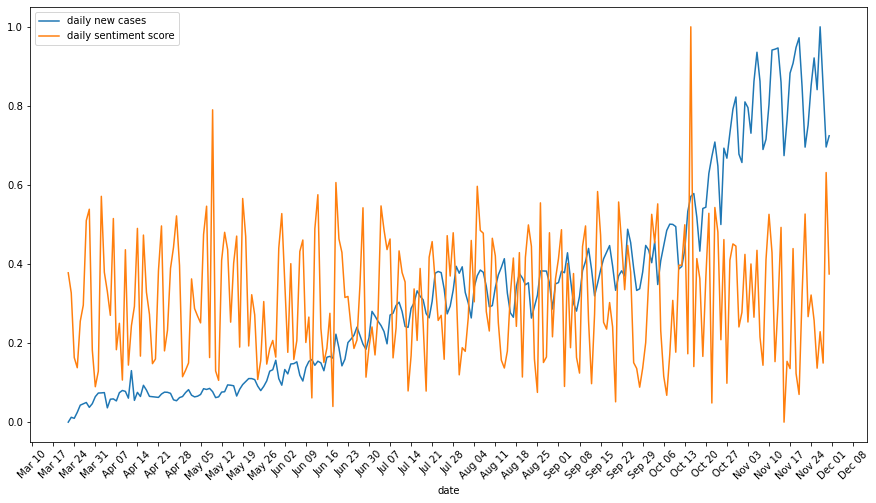

In [51]:
df_case = pd.read_csv('./data/interim/new_cases.csv')
df_case['date'] = pd.to_datetime(df_case['date'])
case = (df_case['new_cases'] - df_case['new_cases'].min()) / (df_case['new_cases'].max() - df_case['new_cases'].min())
preds = np.array(preds)
sent = (preds - preds.min()) / (preds.max() - preds.min())


fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df_case['date'], case)
ax.plot(df_case['date'], sent)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.legend(['daily new cases', 'daily sentiment score'])
plt.xlabel('date')
plt.xticks(rotation=45)
plt.show()

In [11]:
def data_cleaning(csv_file):
    trained = pd.read_csv(csv_file, encoding = "ISO-8859-1", header = None)
    trained.columns = ['sentiment', 'id', 'date', 'flag', 'user', 'text']
    trained = trained[['text', 'sentiment']]
    trained['sentiment'] = trained['sentiment'].replace(0, -1).replace(4, 1).replace(2, 0)
    trained['text'] = trained['text'].str.lower()
    labels = trained['sentiment']
    return trained

def remove_hashtags(text):
    text = re.sub(r"^#\S+|\s#\S+", '', text)
    return text

def remove_urls(text):
    text = re.sub(r'http\S+', '', text)
    return text

def remove_ats(text):
    text = re.sub(r"^@\S+|\s@\S+", '', text)
    return text

def text_cleaning(df):
    df['text'] = df['text'].apply(remove_hashtags)
    df['text'] = df['text'].apply(remove_urls)
    df['text'] = df['text'].apply(remove_ats)
    return df

In [14]:
df=data_cleaning('test/testdata/training.1600000.processed.noemoticon.csv')
text_cleaning(df)

,text,sentiment
0,"just wake up, sun in rome but cloudly... i thi...",-1
1,have a productive day,1
2,anyone who knows how to speed up slow download...,-1
3,i feel excluded ........ ;),-1
4,which laptop is it i always wanted a mini lap...,1
5,"i was movin forward, sista!",1
6,it's the top 10 hun. if it's 9pm may 22nd the...,-1
7,i've been working all day longgggggg! need t...,-1
8,gonna watch some tv - i'm out maynee,1
9,sickk again... nothing getting done except sle...,-1


In [7]:
df.sample(15).to_csv('test/testdata/training.1600000.processed.noemoticon.csv',index=False)

In [ ]:
df = pd.read_csv()

In [15]:
import numpy as np
import pandas as pd
import re
import torch
import transformers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import sparse
import os



def tokenize(text):
    tokenizer_class, pretrained_weights = (transformers.BertTokenizer, 'bert-base-uncased')
    tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
    encode_text = tokenizer.encode(text, add_special_tokens = True)
    return encode_text


def tokenization(df):
    tokenized_text = df['text'].apply(tokenize)
    return tokenized_text


def padding(tokenized_text):
    max_length = 0
    for i in range(len(tokenized_text)):
        length = len(tokenized_text[i])
        if length > max_length:
            max_length = length
    for i in range(len(tokenized_text)):
        tokenized_text[i] = tokenized_text[i] + (max_length - len(tokenized_text[i]))*[0]
    lis = [tokenized_text[0]]
    for i in range(1, len(tokenized_text)):
        lis = lis + [tokenized_text[i]]
    trained_matrix = sparse.csr_matrix(lis)
    return trained_matrix


def model_trained(trained_matrix, df):
    labels = df['sentiment']
    X_train, X_test, y_train, y_test = train_test_split(trained_matrix, labels, test_size=0.25, random_state=42)
    model = LogisticRegression(max_iter=500)
    model.fit(X_train, y_train)
    value = model.predict(X_test)
    accuracy = accuracy_score(value, y_test)
    return accuracy,model

In [18]:
df = pd.read_csv('data/interim/trained_clean.csv')
padding(df['text'].apply(tokenize))

<16x36 sparse matrix of type '<class 'numpy.longlong'>'
	with 267 stored elements in Compressed Sparse Row format>

In [3]:
df = pd.read_csv('data/interim/2020-05-20-clean.csv')
df

,tweet_id,text,location,retweeted,hashtag,follower_count,created_at,language,clean_text
0,3247823987,"RT @brftball: BREAKING:Children of the sun, se...",Thousand Sunny,False,[],58,Wed May 20 04:27:30 +0000 2020,en,breakingchildren sun see time begun searching ...
1,12415909714,RT @WornLK: It's time to take care of each oth...,Sri Lanka,False,[],34,Wed May 20 05:02:09 +0000 2020,en,time take care great
2,2342541,"Barnaby The Bears my name, never call me Jack ...",Some,True,[],1243,Wed May 20 12:56:09 +0000 2020,en,barnaby bears name never call jack james sing ...


In [22]:
df

,tweet_id,text,location,retweeted,hashtag,follower_count,created_at,language,clean_text
0,1285810000,RT @AB: Exclusive: #Covid will tackle coronavi...,where,False,['Covid'],223,Tue May 19 04:04:17 +0000 2020,en,exclusive covid tackle coronavirus pandemic se...
1,12432535287,RT @Xixi: Its not to late to register for our ...,some,False,[],422,Tue May 19 07:29:10 +0000 2020,en,late register great program
2,12858431305,"RT @Spend: BREAKING: Treacle pudding, fish and...","Chesapeake, VA",False,[],573,Tue May 19 19:11:48 +0000 2020,en,breaking treacle pudding fish chips fizzy drin...
